In [1]:
print("Check if LightPipes has been installed. If not, install it!")
!pip install lightpipes


Check if LightPipes has been installed. If not, install it!


In [2]:
from IPython.display import HTML
HTML('''
        <script>
                code_show=true; 
                function code_toggle() 
                {
                     if (code_show)
                     {
                         $('div.input').hide();
                     } else
                     {
                         $('div.input').show();
                     }
                     code_show = !code_show
                } 
                $( document ).ready(code_toggle);
        </script>
        The raw code for this IPython notebook is by default hidden for easier reading.
        To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.
        ''')

In [3]:
import ipywidgets as widgets
from IPython.display import Javascript, display
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))
button = widgets.Button(description="Start simulation")
button.style.button_color = 'lightgreen'
button.on_click(run_all)
display(button)

<IPython.core.display.Javascript object>

Button(description='Start simulation', style=ButtonStyle(button_color='lightgreen'))

Button(description='Start simulation', style=ButtonStyle(button_color='lightgreen'))

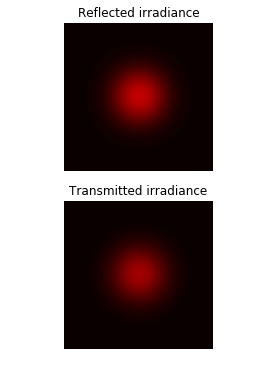

In [5]:
%matplotlib inline
#!/usr/bin/env python
"""
    Computer practical 2. Internal reflection and refraction.
    =========================================================

    This is part of the 'computer practical' set of assignments.
    Demonstrates internal reflection and refraction.
    Find the Brewster- and critical angle and from this determine
    the refractice index of the glass.
"""
import matplotlib
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys
import math
import webbrowser


if sys.version_info[0] < 3:
    from Tkinter import *
    import Tkinter as Tk
else:
    from tkinter import *
    import tkinter as Tk
from LightPipes import *

root = Tk.Tk()
root.wm_title("Computer practical: 2. Internal reflection and refraction.        LP-version = " + LPversion)
root.wm_protocol("WM_DELETE_WINDOW", root.quit)

deg=1.0
wavelength=632.8*nm;
Nair = 1.0;
Nglass = 1.53
PhiPol=79.0*deg
PhiIn=40.0*deg
size = 5.0*mm;
N=100

fig=plt.figure(figsize=(4,6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)


phipol = DoubleVar()
phiin = DoubleVar()
v=StringVar()
phipol.set(PhiPol)
phiin.set(PhiIn)
canvas = FigureCanvasTkAgg(fig, master=root)
canvas._tkcanvas.pack(side=Tk.LEFT, fill=Tk.BOTH, expand=1)

#set the correct backend
if sys.platform == 'darwin':
    %matplotlib osx

def TheExample(event):
    rad = math.pi/180.0
    F=Begin(size,wavelength,N)
    PhiIn=phiin.get()
    PhiPol=phipol.get()
    I_s = math.pow(math.sin(PhiPol * rad), 2.0)
    I_p = math.pow(math.cos(PhiPol * rad), 2.0)
    PIn = PhiIn * rad
    P = Nglass * math.sin(PIn) / Nair
    if (P >= 1.0):
        T_s = 0.0
        T_p = 0.0
    else:
        PhiT = math.asin(P);
        if (PIn == 0.0 and PhiT == 0.0):
            T_s = 4.0 * Nair * Nglass/math.pow(Nair + Nglass,2.0);
            T_p = T_s;
        else:
            T_s = Nair * math.cos(PhiT) * math.cos(PIn) / Nglass * math.pow(2.0*math.sin(PhiT) / math.sin(PIn + PhiT), 2.0);
            T_p = Nair * math.cos(PhiT) * math.cos(PIn) / Nglass * math.pow(2.0*math.sin(PhiT) / (math.sin(PIn + PhiT)*math.cos(PIn - PhiT)), 2.0);
    R_s = 1.0 - T_s;
    R_p = 1.0 - T_p;
    I_T = T_s * I_s + T_p * I_p;
    I_R = R_s * I_s + R_p * I_p;
    F1=GaussHermite(0,0,I_R,size/4,F);
    F2=GaussHermite(0,0,I_T,size/4,F);
    v.set( "Reflected power = %5.3f mW\n"% I_R +
        "Transmitted power = %5.3f mW\n"%I_T
        )
    I1=Intensity(0,F1);
    I2=Intensity(0,F2);
    ax1.clear()
    ax1.contourf(I1,50,vmin=0., vmax=1.,cmap='hot'); ax1.axis('off'); ax1.axis('equal')
    ax1.set_title('Reflected irradiance') 
    ax2.clear()
    ax2.contourf(I2,50,vmin=0., vmax=1.,cmap='hot'); ax2.axis('off'); ax2.axis('equal')
    ax2.set_title('Transmitted irradiance')
    canvas.draw()

def openbrowser(event):
    webbrowser.open_new(r"https://opticspy.github.io/lightpipes/Reflect.html")

def _quit():
    root.quit()



Label(root, textvariable=v).pack(pady=50)

Scale(  root,
        takefocus=1,
        orient='horizontal',
        label = 'polarization angle [deg]',
        length = 200, from_=0.000, to=90.0,
        resolution = 0.01,
        variable = phipol,
        cursor="hand2",
        command = TheExample
        ).pack()

Scale(  root,
        takefocus=1,
        orient='horizontal',
        label = 'angle of incidence [deg]',
        length = 200,
        from_=0.000, to=90.0,
        resolution = 0.01,
        variable = phiin,
        cursor="hand2",
        command = TheExample
        ).pack()

Button( root,
        width = 24,
        text='Quit',
        cursor="hand2",
        command=_quit).pack( pady=10)

link = Label(root, text="help", fg="blue", cursor="hand2")
link.pack()
link.bind("<Button-1>", openbrowser)

TheExample(0)

root.mainloop()
root.destroy()